<a href="https://colab.research.google.com/github/shakil1819/CSE442-Machine-Learning-Sessional/blob/main/Evaluation_practice_02_Q_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Classifier


```
 tutorial link : https://www.datacamp.com/tutorial/decision-tree-classification-python
```



In [2]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import sklearn
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr #Ignores the warnings
wr.filterwarnings('ignore')
df=pd.read_csv("https://raw.githubusercontent.com/shakil1819/CSE442-Machine-Learning-Sessional/main/Practice-Evaluation-02/Office%20Dataset.csv")
df

,Coffee_Consumption,Desk_Proximity,Hours_of_Sleep,Work_Output
0,3,2.5,7.5,32
1,2,3.0,6.0,24
2,4,2.2,6.8,36
3,5,1.8,5.5,40
4,1,4.0,8.0,18
5,2,2.7,7.2,28
6,3,3.5,6.5,34
7,4,2.0,7.0,38
8,3,3.2,6.3,30
9,2,2.8,6.7,26


# Data Pre-processing

## Checking the NULL values

In [3]:
df.drop('Work_Output', axis=1, inplace=True)
df.head()

,Coffee_Consumption,Desk_Proximity,Hours_of_Sleep
0,3,2.5,7.5
1,2,3.0,6.0
2,4,2.2,6.8
3,5,1.8,5.5
4,1,4.0,8.0


### 1.7.5.2 Define dependent (target) and independent (predictor) features

In [4]:
def fun(row):
    if row["Coffee_Consumption"]<=2.0:
      if row["Desk_Proximity"]<=2.0:
        if row["Hours_of_Sleep"]<=6.0:
          return "Low"
        else:
          return "Medium"
      else:
        return "Medium"
    else:
      if row["Desk_Proximity"]<=3.0:
        if row["Hours_of_Sleep"]<=6.0:
          return "Medium"
        else:
          return "High"
      else:
        return "High"

df['Category'] = df.apply(fun,axis=1)
df.head()

,Coffee_Consumption,Desk_Proximity,Hours_of_Sleep,Category
0,3,2.5,7.5,High
1,2,3.0,6.0,Medium
2,4,2.2,6.8,High
3,5,1.8,5.5,Medium
4,1,4.0,8.0,Medium


In [5]:

y=df['Category']
y


0       High
1     Medium
2       High
3     Medium
4     Medium
5     Medium
6       High
7       High
8       High
9     Medium
10      High
11      High
12    Medium
13      High
14    Medium
15      High
16      High
17    Medium
18      High
19    Medium
20      High
Name: Category, dtype: object

In [6]:
x=df.drop('Category', axis=1)
x

,Coffee_Consumption,Desk_Proximity,Hours_of_Sleep
0,3,2.5,7.5
1,2,3.0,6.0
2,4,2.2,6.8
3,5,1.8,5.5
4,1,4.0,8.0
5,2,2.7,7.2
6,3,3.5,6.5
7,4,2.0,7.0
8,3,3.2,6.3
9,2,2.8,6.7


In [7]:
clf = DecisionTreeClassifier()
clf.fit(x,y)

DecisionTreeClassifier()

In [8]:
clf.predict([[3,2.5,7.5]])

array(['High'], dtype=object)

[Text(0.4, 0.8333333333333334, 'x[0] <= 2.5\ngini = 0.49\nsamples = 21\nvalue = [12, 9]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.6, 0.5, 'x[2] <= 5.8\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]')]

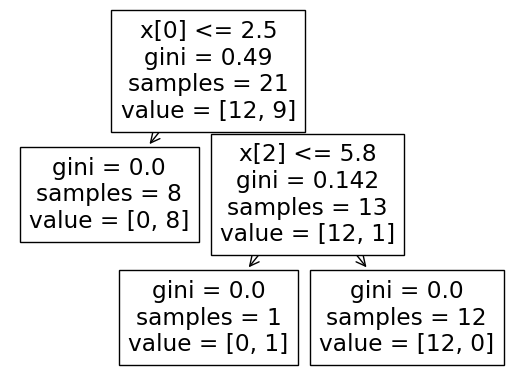

In [9]:
tree.plot_tree(clf)

[Text(0.4, 0.8333333333333334, 'x[0] <= 2.5\ngini = 0.49\nsamples = 21\nvalue = [12, 9]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.6, 0.5, 'x[2] <= 5.8\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]')]

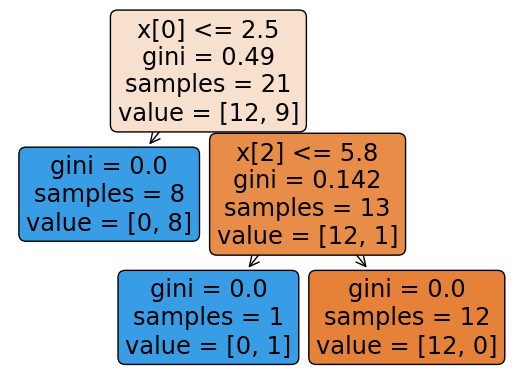

In [10]:
tree.plot_tree(clf, rounded=True, filled=True)

[Text(0.4, 0.8333333333333334, 'Coffee_Consumption <= 2.5\ngini = 0.49\nsamples = 21\nvalue = [12, 9]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.6, 0.5, 'Hours_of_Sleep <= 5.8\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]')]

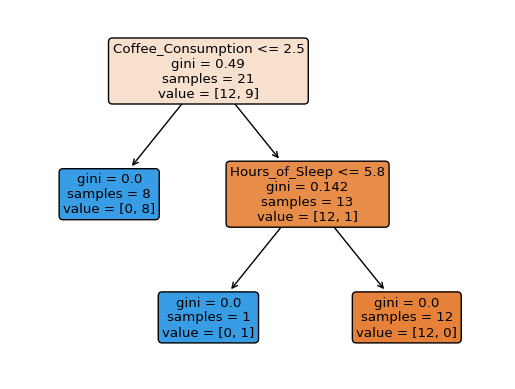

In [11]:
tree.plot_tree(clf, rounded=True, filled=True, feature_names=x.columns)


[Text(0.4, 0.8333333333333334, 'Coffee_Consumption <= 2.5\ngini = 0.49\nsamples = 21\nvalue = [12, 9]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.6, 0.5, 'Hours_of_Sleep <= 5.8\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]')]

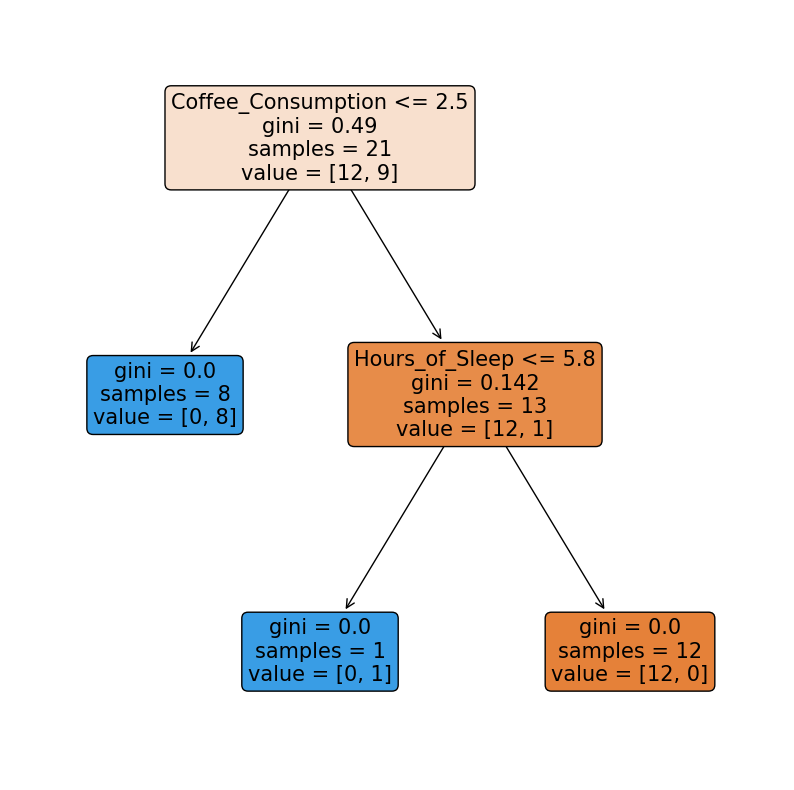

In [12]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf, rounded=True, filled=True, feature_names=x.columns)

In [13]:
text_rep = tree.export_text(clf)

In [14]:
print(text_rep)

|--- feature_0 <= 2.50
|   |--- class: Medium
|--- feature_0 >  2.50
|   |--- feature_2 <= 5.80
|   |   |--- class: Medium
|   |--- feature_2 >  5.80
|   |   |--- class: High

